# FIFA 20 ANALYSIS

Name : Bhushan Ingale

Date of Start: 30/09/2023

Project ID: PRCP-1004-Fifa20

Team ID: PTID-CDS-SEP-23-1652

## 1. Domain Analysis

### 1.1 Introduction
FIFA 20 Football is arguably the most popular sport in the world and FIFA is the most popular Football (soccer) simulation game by Electronic Arts (EA Sports).

The Dataset includes the players data for the Career Mode from FIFA 15 to FIFA 20: `players_20.csv`. The data allows multiple comparisons of the same players across the last 6 versions of the video game.

### 1.2 Problem Statement

1. Task 1: Prepare a complete data analysis report on the given data.

2. Task 2: Explore football skills and cluster football players based on their attributes.

3. Task 3: Explore the data and attempt all the below asked questions in a step by step manner:
     - Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
     - Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
     - Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 

### 1.3 Project Type:

- Exploratory Data Analysis


---

## 2. Set-up

### 2.1 Importing Libraries as Dataset

In [2]:
# Importing important libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_style(style='darkgrid')

In [3]:
# Importing the dataset into a Pandas DataFrame:
data = pd.read_csv('players_20.csv')

### 2.2. Initial Exploration

In [4]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [5]:
data.shape

(18278, 104)

- As we can see, there are a lot of columns in this dataset.
- We might not need every single one of them, so now we can assess the columns we need and remove the unrequired columns.

In [6]:
# Printing a list of all columns:

col = list(data.columns)
print(col)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [7]:
# Setting up unrequired columns:
unrequired_cols = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']


In [9]:
# Dropping unrequired columms:
data = data.drop(unrequired_cols, axis = 1)


In [10]:
data.sample(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3976,D. Dibusz,28,188,81,Hungary,Hungary,72,72,0,0,GK,Right,1,3,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,67.0,70.0,74.0,23.0,70.0,Acrobatic Clearance,14,15,18,23,16,16,14,19,22,20,27,20,21,68,21,53,34,19,36,17,20,19,13,18,19,65,12,15,18,73,67,70,70,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14538,H. Ramírez,35,186,82,Argentina,Unión Magdalena,61,61,70000,1000,GK,Right,1,3,1,Medium/Medium,95000.0,NaN,GK,1.0,2019-07-08,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,59.0,65.0,63.0,12.0,66.0,NaN,23,12,16,23,19,15,20,20,23,15,14,11,18,49,21,49,35,19,51,18,22,10,13,31,24,31,10,11,10,56,59,65,66,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,M. Kean,19,182,79,Italy,Everton,76,89,14500000,43000,ST,Right,1,3,3,Medium/Medium,36600000.0,NaN,SUB,27.0,2019-08-05,2024.0,81.0,72.0,50.0,77.0,30.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,77,72,59,70,77,66,43,38,78,80,82,74,72,78,72,75,72,75,60,45,21,78,51,65,72,27,28,16,13,8,10,7,9,74+2,74+2,74+2,70+2,72+2,72+2,72+2,70+2,68+2,68+2,68+2,67+2,59+2,59+2,59+2,67+2,49+2,46+2,46+2,46+2,49+2,47+2,44+2,44+2,44+2,47+2
14195,A. Al Najjar,22,175,68,Saudi Arabia,Abha Club,61,71,400000,3000,"RM, LM, CAM",Right,1,3,3,High/Medium,740000.0,NaN,RW,31.0,2019-07-13,2021.0,78.0,56.0,57.0,63.0,44.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,55,42,61,48,62,46,63,57,63,77,78,70,55,76,59,51,49,56,57,52,42,53,51,51,49,51,42,36,9,6,14,8,8,57+2,57+2,57+2,60+2,59+2,59+2,59+2,60+2,59+2,59+2,59+2,60+2,55+2,55+2,55+2,60+2,53+2,51+2,51+2,51+2,53+2,51+2,48+2,48+2,48+2,51+2
7006,Mika,28,195,90,Portugal,Os Belenenses,68,71,800000,3000,GK,Left,1,2,1,Medium/Medium,1700000.0,NaN,SUB,39.0,2018-07-01,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,65.0,66.0,70.0,34.0,68.0,NaN,9,13,10,29,14,19,18,12,25,20,37,32,32,60,35,50,54,39,74,19,31,22,12,34,14,31,19,10,9,70,65,66,68,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17926,S. McDonald,21,180,76,Republic of Ireland,UCD AFC,52,60,80000,1000,ST,Right,1,2,2,Medium/Medium,140000.0,NaN,RM,13.0,2017-02-01,2019.0,62.0,51.0,41.0,48.0,19.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,53,48,44,44,43,39,30,32,50,60,63,56,51,57,50,61,44,57,50,49,19,49,46,49,47,15,16,10,12,14,6,10,7,50+2,50+2,50+2,49+2,49+2,49+2,49+2,49+2,48+2,48+2,48+2,47+2,42+2,42+2,42+2,47+2,35+2,33+2,33+2,33+2,35+2,33+2,32+2,32+2,32+2,33+2
8125,L. Cabrera,25,167,73,Chile,Audax Italiano,67,71,900000,2000,"CDM, CM",Right,1,2,3,Medium/Medium,1300000.0,NaN,SUB,21.0,2018-01-09,2021.0,59.0,48.0,59.0,68.0,67.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,42,52,71,32,64,35,33,62,72,61,57,76,54,86,64,66,72,72,49,70,59,54,48,40,59,75,71,64,11,7,9,15,15,56+2,56+2,56+2,59+2,58+2,58+2,58+2,59+2,60+2,60+2,60+2,61+2,62+2,62+2,62+2,61+2,65+2,66+2

In [11]:
data.shape

(18278, 95)

## 3. Data Preprocessing

### 3.1 One Hot Encoding

In [12]:
# Checking Players and their Positions:
data[['short_name','player_positions']]


,short_name,player_positions
0,L. Messi,"RW, CF, ST"
1,Cristiano Ronaldo,"ST, LW"
2,Neymar Jr,"LW, CAM"
3,J. Oblak,GK
4,E. Hazard,"LW, CF"
...,...,...
18273,Shao Shuai,CB
18274,Xiao Mingjie,CB
18275,Zhang Wei,CM
18276,Wang Haijian,CM


- Since there are multiple Positions listed for one player, we can seperate and place them into new columns.
- We will create a new Dataframe with the seperated Player Positions and later `concat` to the main DataFrame.
- We will use One Hot encoding method with the `get_dummies()` function

In [13]:
# New DataFrame with Dummy Values for Player Positions:
new_player_position = data['player_positions'].str.get_dummies(sep=',').add_prefix('Position')
new_player_position.head()

,Position CAM,Position CB,Position CDM,Position CF,Position CM,Position LB,Position LM,Position LW,Position LWB,Position RB,Position RM,Position RW,Position RWB,Position ST,PositionCAM,PositionCB,PositionCDM,PositionCF,PositionCM,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [16]:
print(type(new_player_position))

<class 'pandas.core.frame.DataFrame'>


In [17]:
# Concatenating the `new_player_position` DataFrame with main DataFrame `data`:

data =  pd.concat([data,new_player_position],axis = 1)

In [18]:
data.tail()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Position CAM,Position CB,Position CDM,Position CF,Position CM,Position LB,Position LM,Position LW,Position LWB,Position RB,Position RM,Position RW,Position RWB,Position ST,PositionCAM,PositionCB,PositionCDM,PositionCF,PositionCM,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,70000.0,NaN,RES,36.0,2018-07-13,2019.0,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,72000.0,NaN,SUB,31.0,2019-02-01,2022.0,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,70000.0,NaN,SUB,38.0,2019-01-01,2019.0,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,70000.0,NaN,SUB,33.0,2019-02-01,2022.0,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
18277,Pan Ximing,26,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,NaN,NaN,SUB,37.0,NaN,2019.0,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


- One Hot Encoded Positions have been added at the end of the DataFrame.
- Now, we can drop the original column `player_positions` to avoid redundancy.

In [19]:
# Dropping 'player_positions' columns:

data =  data.drop('player_positions',axis=1)

### 3.2 Cleaning the Data

- Now, there are values in columns `ls`, `st`, `rs`, `lw` etc. that are not numbers. We need to `split` those values.
- We also need to treat the missing values.

In [22]:
cols = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [23]:
# Take a look at above columns:
data[cols].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [24]:
# Splitting the values that have '+'
for col in cols:
  data[col] = data[col].str.split('+',n=1,expand = True)[0]

data[cols]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,31,33,33,33,33,33,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,33,35,36,36,36,35,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,44,45,46,46,46,45,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,46,46,46,46,46,46,48,48,48,48,48,48,49,49,49,48


In [25]:
# Filling the missing values with 0:
data[cols] = data[cols].fillna(0)

In [26]:
# Now converting the datatype to int:
data[cols] = data[cols].astype(int)

In [27]:
data[cols]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,31,33,33,33,33,33,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,33,35,36,36,36,35,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,44,45,46,46,46,45,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,46,46,46,46,46,46,48,48,48,48,48,48,49,49,49,48


### 3.3 Missing Values

- We will now treat the missing values in the columns that we need for analysis

In [28]:
columns = ['dribbling','defending','physic','passing','shooting','pace']
data[columns]

,dribbling,defending,physic,passing,shooting,pace
0,96.0,39.0,66.0,92.0,92.0,87.0
1,89.0,35.0,78.0,82.0,93.0,90.0
2,95.0,32.0,58.0,87.0,85.0,91.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,94.0,35.0,66.0,86.0,83.0,91.0
...,...,...,...,...,...,...
18273,33.0,47.0,51.0,28.0,23.0,57.0
18274,35.0,48.0,48.0,33.0,24.0,58.0
18275,45.0,48.0,51.0,44.0,35.0,54.0
18276,47.0,45.0,52.0,47.0,35.0,59.0


In [29]:
# Checking for null values:
data[columns].isnull().sum()

dribbling    2036
defending    2036
physic       2036
passing      2036
shooting     2036
pace         2036
dtype: int64

In [30]:
# Filling the missing values with Median of the column:
for col in columns:
  data[col] = data[col].fillna(data[col].median())
data[columns]

,dribbling,defending,physic,passing,shooting,pace
0,96.0,39.0,66.0,92.0,92.0,87.0
1,89.0,35.0,78.0,82.0,93.0,90.0
2,95.0,32.0,58.0,87.0,85.0,91.0
3,64.0,56.0,66.0,58.0,54.0,69.0
4,94.0,35.0,66.0,86.0,83.0,91.0
...,...,...,...,...,...,...
18273,33.0,47.0,51.0,28.0,23.0,57.0
18274,35.0,48.0,48.0,33.0,24.0,58.0
18275,45.0,48.0,51.0,44.0,35.0,54.0
18276,47.0,45.0,52.0,47.0,35.0,59.0


- Now, we will fill the rest of the DataFrame Missing values with 0

In [31]:
data = data.fillna(0)

In [37]:
data.isnull().sum().any()

False

## 4. EDA

### 4.1 Analysis of Top 10 Players
#### Countries that have Maximun players in Top 10

In [140]:
data.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Position CAM,Position CB,Position CDM,Position CF,Position CM,Position LB,Position LM,Position LW,Position LWB,Position RB,Position RM,Position RW,Position RWB,Position ST,PositionCAM,PositionCB,PositionCDM,PositionCF,PositionCM,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,164700000.0,0,GK,13.0,2014-07-16,2023.0,69.0,54.0,58.0,64.0,56.0,66.0,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,K. De Bruyne

In [141]:
# Group the data by category and count the number of unique products in each group
top_10_list = data.head(10).reset_index()

top_10_list = top_10_list.groupby('nationality').agg({'short_name':['count']})
# Here, 'count' also works in palce of 'nunique', depends on the situation.

top_10_list

,short_name
,count
nationality,
Argentina,1
Belgium,2
Brazil,1
Croatia,1
Egypt,1
Germany,1
Netherlands,1
Portugal,1


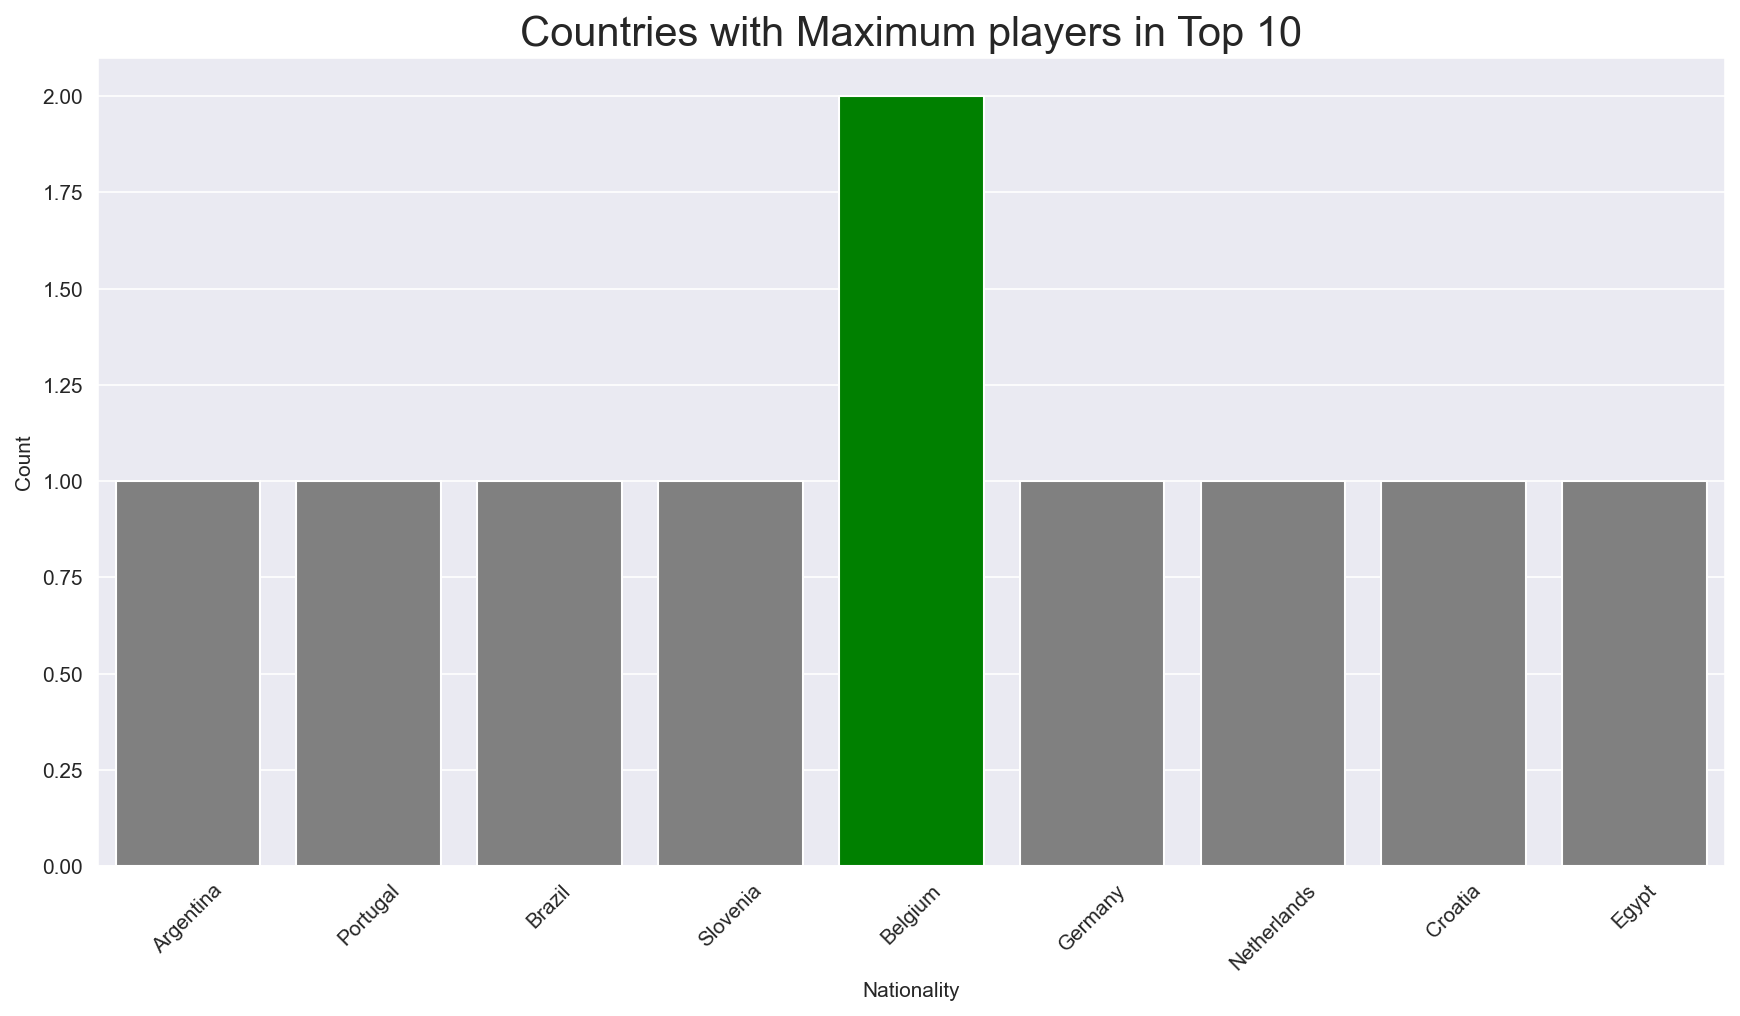

In [144]:
plt.figure(figsize=(14,7),dpi=150)
ax = sns.countplot(x='nationality',
                   data=data.head(10),
                   color='grey')

# Below code seems to work on only one max value:
patch_h = [patch.get_height() for patch in ax.patches]
idx_tallest = np.argmax(patch_h)
ax.patches[idx_tallest].set_facecolor('green')

plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Countries with Maximum players in Top 10',fontsize = 20)
plt.show()

- Belgium had most players (i.e. 2) in top 10

### 4.2 Age Analysis
#### Overall Rating vs Age

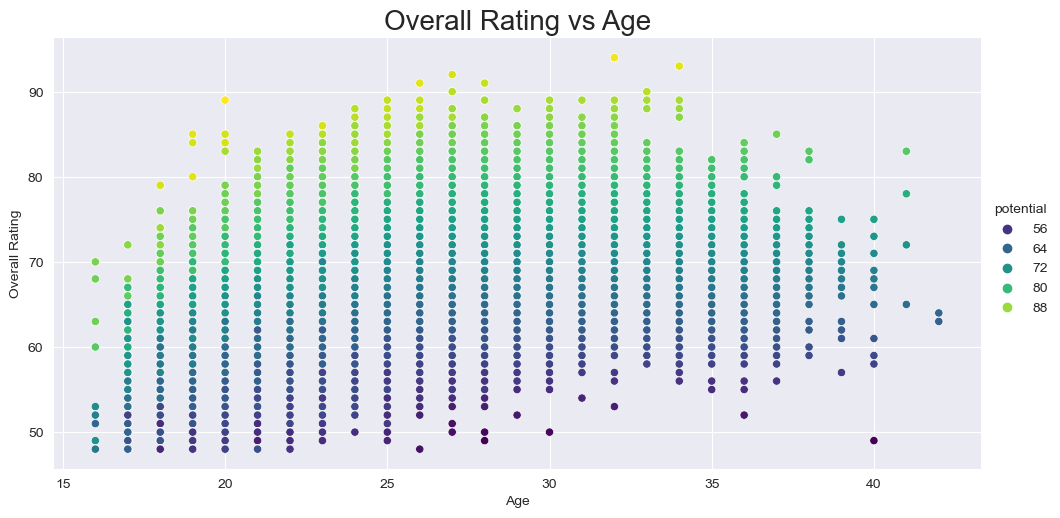

In [145]:



# Plotting Overall Rating vs Age:
sns.relplot(x='age',
            y='overall',
            hue='potential',
            palette = 'viridis',
            sizes=(15, 200),
            aspect=2,
            data=data)

plt.title('Overall Rating vs Age',fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

- After age 32, the Overall Rating does not seem to increase anymore.
- General range for improvement in Overall Rating is 16 to 27 for most players.

#### Age Distribution

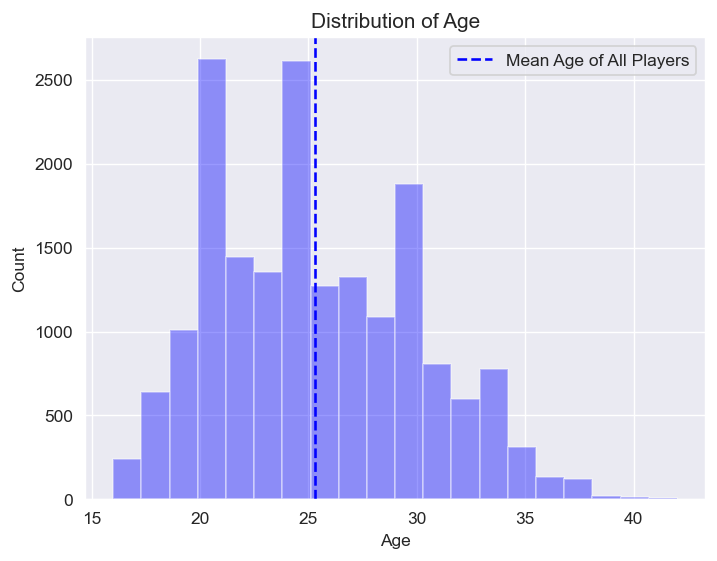

In [146]:
plt.figure(dpi=125)
sns.distplot(a=data['age'],
             kde=False,
             bins=20,
             color='blue')

plt.axvline(x=np.mean(data['age']),c='blue',ls='--',label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

### 4.3 Wage Analysis

#### Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?

In [149]:
data.head(3)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Position CAM,Position CB,Position CDM,Position CF,Position CM,Position LB,Position LM,Position LW,Position LWB,Position RB,Position RM,Position RW,Position RWB,Position ST,PositionCAM,PositionCB,PositionCDM,PositionCF,PositionCM,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [168]:
wage_group = data.groupby('team_position')

wage_group.agg({'value_eur': ['median', 'max']})


value_eur           
                  median        max
team_position                      
0                    0.0          0
CAM            1900000.0  105500000
CB              737500.0   31500000
CDM            1300000.0   55000000
CF             6100000.0   52000000
CM             1200000.0   37500000
GK              912500.0   77500000
LAM            2400000.0   24000000
LB              850000.0   43500000
LCB             950000.0   78000000
LCM            1200000.0   57000000
LDM            1100000.0   72500000
LF             3100000.0   27500000
LM             1300000.0   60000000
LS             1400000.0   52000000
LW             1500000.0   90000000
LWB             575000.0   14500000
RAM            1400000.0   45000000
RB              900000.0   48000000
RCB            1100000.0   51500000
RCM            1200000.0   90000000
RDM            1200000.0   50500000
RES             375000.0   46000000
RF             1300000.0   46000000
RM             1200000.0   68000000
RS             1400000.0   35000000
RW             1800000.0   95500000
RWB             650000.0   15500000
ST             1800000.0   83000000
SUB             625000.0   61000000

- Both Strikers and Right Wingers have the same Median Wage as 1800000 EUR
- But the *Right Winger* has the overall Maximum Wage

    - Maximum Wage for LW is: 90000000
    - Maximum Wage for ST is: 83000000
    - Maximum Wage for RW is: 95500000


In [169]:
max_wage = data[data['value_eur'] == 95500000]
max_wage

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Position CAM,Position CB,Position CDM,Position CF,Position CM,Position LB,Position LM,Position LW,Position LWB,Position RB,Position RM,Position RW,Position RWB,Position ST,PositionCAM,PositionCB,PositionCDM,PositionCF,PositionCM,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### 4.4 Other Analysis

#### Which age belongs to Maximum players in Top 10?

In [153]:
top_10_age = data.head(10).reset_index()

top_10_age = top_10_age.groupby('age').agg({'short_name':['count']})

top_10_age.reset_index()

,age,short_name
,,count
0,26,1
1,27,4
2,28,2
3,32,1
4,33,1
5,34,1


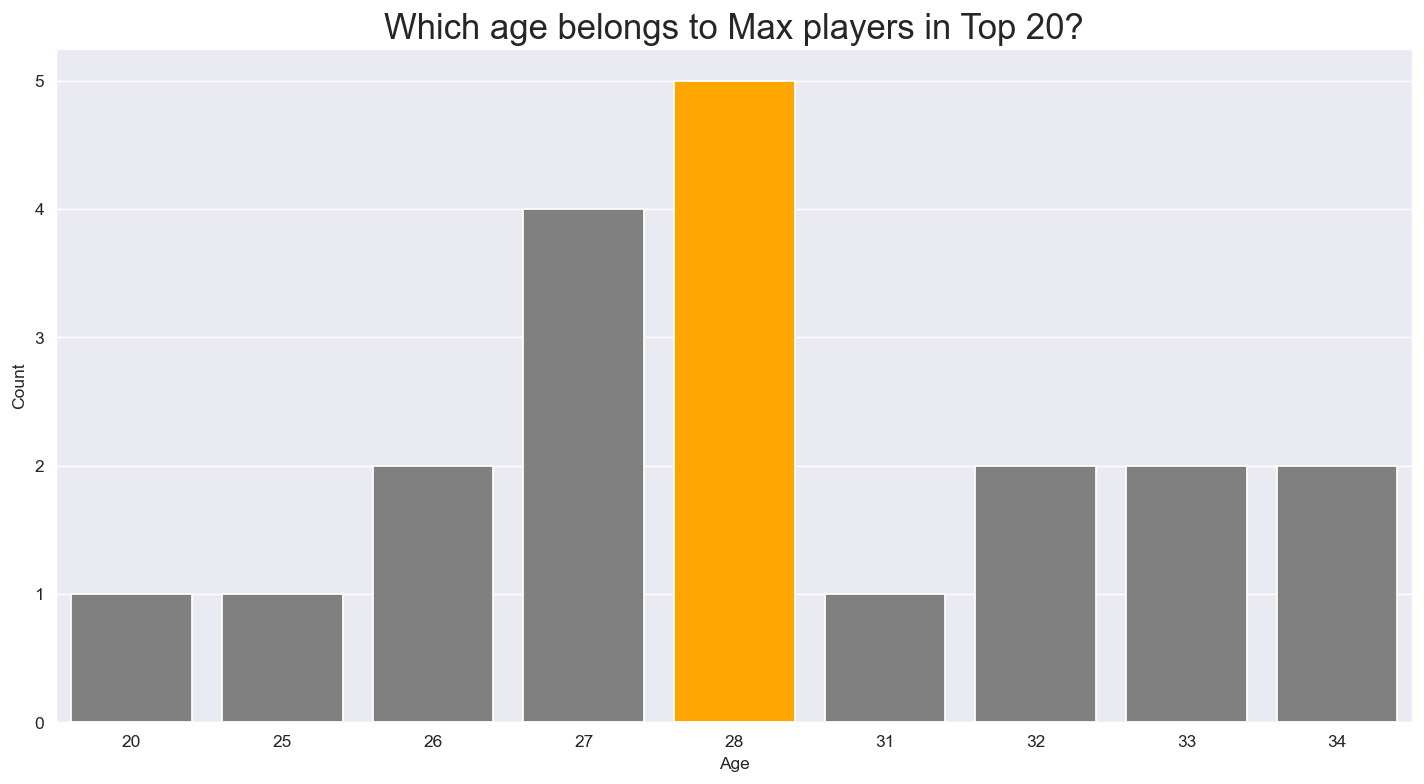

In [157]:
plt.figure(figsize=(14,7),dpi=125)
ax1 = sns.countplot('age',data=data.head(20),color='grey')

# Below code seems to work on only one max value:
patch_h = [patch.get_height() for patch in ax.patches]
idx_tallest = np.argmax(patch_h)
ax1.patches[idx_tallest].set_facecolor('orange')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Which age belongs to Max players in Top 20?',fontsize = 20)
plt.show()

#### Preferred Foot

Left Preferred 4318
Right Preferred 13960


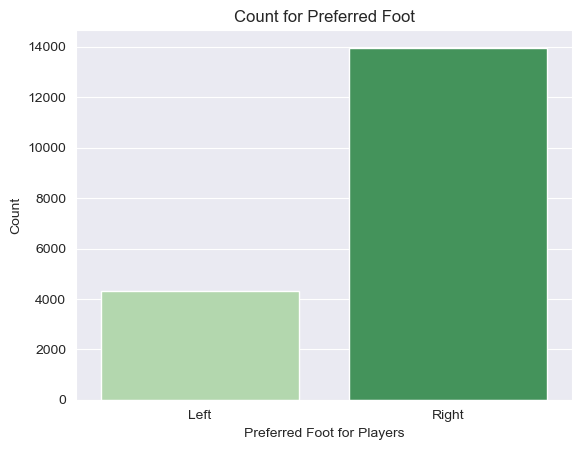

In [159]:
# Plotting Preferred Foot
plt.figure(dpi=100)
sns.countplot('preferred_foot',data=data,palette='Greens')
plt.xlabel('Preferred Foot for Players')
plt.ylabel('Count')
plt.title('Count for Preferred Foot')
Right,Left=data.preferred_foot.value_counts()
print('Left Preferred',Left)
print('Right Preferred',Right)
plt.show()

### 4.5 Analysing Player Skills

In [178]:
# Gettign a DataFrame for Messi & Ronaldo
column_r=['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']
rival = data.head(2)[column_r]
rival= rival.set_index('short_name')
rival.head()

,overall,potential,pace,shooting,passing,dribbling,defending,physic
short_name,,,,,,,,
L. Messi,94,94,87.0,92.0,92.0,96.0,39.0,66.0
Cristiano Ronaldo,93,93,90.0,93.0,82.0,89.0,35.0,78.0


In [181]:
# Creating a values list for Messi:
values = rival.iloc[0].tolist()
values += values [:1]
values

[94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0]

In [182]:
# Creating a values list for Ronaldo:
values2 = rival.iloc[1].tolist()
values2 += values2[:1]
values2

[93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0]

In [185]:
# Defining a function to create a Radar Chart:
from math import pi

def RadarChart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'red', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()
    

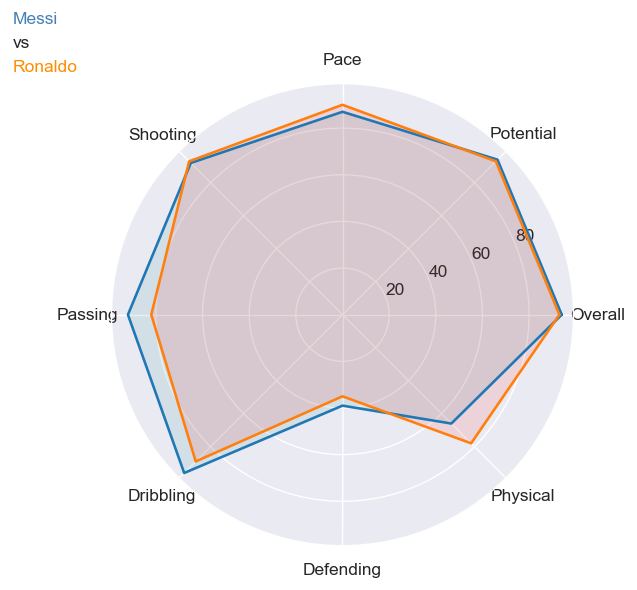

In [186]:
RadarChart("Messi",[94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0],"Ronaldo",[93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0])

For given 8 skills:
- **Messi** performed well in **5**: `Potential`, `Dribbling`, `Passing`, `Defending` & `Overall`
- **Ronaldo** performed well in **3**: `Pace`, `Shooting` & `Physical`
---

## 5. Report
### 5.1 Data Analysis Report:

- Task 1: We have created a Data Analysis Report on the Data.
- Task 2: We have analysed Player Skills: Messi vs Ronaldo
- Task 3: Answered EDA questions as below:
    - 1: **Belgium** had most players (i.e. 2) in top 10
    - 2: After age **32**, the Overall Rating does not seem to increase anymore. General range for improvement in Overall Rating is 16 to 27 for most players.
    - 3: The **Right Wingers** dominate the overall Maximum and Median Wage.

### 5.2 Challenges:
- Data Cleaning & dealing with Missing Values
- Identifying Unnecessary Columns


## 6. Conclusion

FIFA 20 dataset provides a great opportunity to gather insights for various Football Teams, Clubs and Top Rated Players. We have performed Data Analysis & Visualisation on top performing 10 Players and collected insights for various Ages and Salaries for the players.

Name : Bhushan Ingale

Date of completion: 04/10/2023

Project ID: PRCP-1004-Fifa20

Team ID: PTID-CDS-SEP-23-1652